In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [2]:
relevant_cols = [
    "edad",
    "imc",
    "f_diag",
    "tipo_histologico",
    "Grado",
    "valor_de_ca125",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "fecha_qx",
    "asa",
    "histo_defin",
    "grado_histologi",
    "tamano_tumoral",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "recep_est_porcent",
    "rece_de_Ppor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "recidiva",
    "rdt",
]

In [3]:
data = pd.read_csv("../data_source/IQ_Cancer_Endometrio_merged_NMS.csv")
data_relevant = data[relevant_cols]
data_relevant.head()

,edad,imc,f_diag,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltobj,ecotv_infiltsub,metasta_distan,estadiaje_pre_i,...,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,bqt,qt,Tributaria_a_Radioterapia,recidiva,rdt
0,68.0,39.40,2023-11-03,2,2,283.0,4.0,2.0,1.0,2.0,...,0.0,1.0,9.0,14.0,5.0,0.0,1.0,0.0,0,NaN
1,92.0,24.14,2019-10-24,1,1,NaN,3.0,4.0,0.0,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,72.0,38.80,2020-07-16,2,1,NaN,3.0,4.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,NaN
3,78.0,36.30,2021-02-22,2,1,NaN,3.0,3.0,0.0,1.0,...,0.0,1.0,7.0,11.0,5.0,1.0,1.0,1.0,1,2.0
4,68.0,31.10,2019-11-15,2,1,NaN,NaN,3.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,NaN


In [4]:
data_relevant.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,163.0,62.190184,14.524374,0.0,54.00,63.0,72.00,92.0
imc,155.0,30.726258,7.738904,16.7,24.40,29.4,35.30,56.1
tipo_histologico,163.0,4.171779,11.696045,1.0,2.00,2.0,2.00,88.0
Grado,163.0,1.190184,0.393656,1.0,1.00,1.0,1.00,2.0
valor_de_ca125,21.0,148.671429,324.352458,3.7,19.30,30.1,93.80,1486.9
ecotv_infiltobj,157.0,3.331210,1.064512,1.0,3.00,4.0,4.00,4.0
ecotv_infiltsub,162.0,2.629630,0.848007,1.0,2.00,2.5,3.00,4.0
metasta_distan,159.0,0.056604,0.231814,0.0,0.00,0.0,0.00,1.0
estadiaje_pre_i,160.0,0.368750,0.732205,0.0,0.00,0.0,0.00,2.0
grupo_riesgo,161.0,1.515528,0.725479,1.0,1.00,1.0,2.00,3.0


In [5]:
data_relevant.isnull().sum()

edad                            0
imc                             8
f_diag                          2
tipo_histologico                0
Grado                           0
valor_de_ca125                142
ecotv_infiltobj                 6
ecotv_infiltsub                 1
metasta_distan                  4
estadiaje_pre_i                 3
grupo_riesgo                    2
tto_NA                          0
fecha_qx                       12
asa                            19
histo_defin                    12
grado_histologi                18
tamano_tumoral                 31
afectacion_linf                19
AP_centinela_pelvico           31
AP_ganPelv                    108
AP_glanPaor                   131
recep_est_porcent              72
rece_de_Ppor                   74
beta_cateninap                 12
estudio_genetico_r01            9
estudio_genetico_r02            9
estudio_genetico_r03            9
estudio_genetico_r04            9
estudio_genetico_r05            9
estudio_geneti

In [6]:
len(data_relevant)

163

In [7]:
data_relevant = data_relevant[data_relevant["recidiva"] != 2]
data_relevant = data_relevant[data_relevant["edad"] != 0.0]
data_relevant["recidiva"].isnull().sum()

np.int64(0)

In [8]:
data_relevant.drop(columns=data_relevant.select_dtypes(include=["object"]).columns, inplace=True)

### Mover target

In [9]:
cols = list(data_relevant.columns)
cols.remove("recidiva")
cols.insert(0, "recidiva")
data_relevant = data_relevant.reindex(columns=cols)
data_relevant.head()

,recidiva,edad,imc,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltobj,ecotv_infiltsub,metasta_distan,estadiaje_pre_i,...,estudio_genetico_r04,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,FIGO2023,grupo_de_riesgo_definitivo,bqt,qt,Tributaria_a_Radioterapia,rdt
0,0,68.0,39.40,2,2,283.0,4.0,2.0,1.0,2.0,...,0.0,0.0,1.0,9.0,14.0,5.0,0.0,1.0,0.0,NaN
1,0,92.0,24.14,1,1,NaN,3.0,4.0,0.0,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,72.0,38.80,2,1,NaN,3.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
3,1,78.0,36.30,2,1,NaN,3.0,3.0,0.0,1.0,...,0.0,0.0,1.0,7.0,11.0,5.0,1.0,1.0,1.0,2.0
4,0,68.0,31.10,2,1,NaN,NaN,3.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_relevant[cols[1:]], data_relevant[cols[0]], train_size=0.7, stratify=data_relevant["recidiva"], random_state=1)

In [11]:
X_train.isnull().sum() / len(y_train)

edad                          0.000000
imc                           0.009434
tipo_histologico              0.000000
Grado                         0.000000
valor_de_ca125                0.849057
ecotv_infiltobj               0.047170
ecotv_infiltsub               0.000000
metasta_distan                0.028302
estadiaje_pre_i               0.009434
grupo_riesgo                  0.018868
tto_NA                        0.000000
asa                           0.075472
histo_defin                   0.047170
grado_histologi               0.084906
tamano_tumoral                0.160377
afectacion_linf               0.094340
AP_centinela_pelvico          0.169811
AP_ganPelv                    0.669811
AP_glanPaor                   0.801887
recep_est_porcent             0.424528
rece_de_Ppor                  0.433962
beta_cateninap                0.084906
estudio_genetico_r01          0.047170
estudio_genetico_r02          0.047170
estudio_genetico_r03          0.047170
estudio_genetico_r04     

In [12]:
X_train["AP_centinela_pelvico"] = X_train["AP_centinela_pelvico"].fillna(5)
X_train["AP_ganPelv"] = X_train["AP_ganPelv"].fillna(4)
X_train["AP_glanPaor"] = X_train["AP_glanPaor"].fillna(4)

X_train["estudio_genetico_r01"] = X_train["estudio_genetico_r01"].fillna(0)
X_train["estudio_genetico_r02"] = X_train["estudio_genetico_r02"].fillna(0)
X_train["estudio_genetico_r03"] = X_train["estudio_genetico_r03"].fillna(0)
X_train["estudio_genetico_r04"] = X_train["estudio_genetico_r04"].fillna(0)
X_train["estudio_genetico_r05"] = X_train["estudio_genetico_r05"].fillna(0)
X_train["estudio_genetico_r06"] = X_train["estudio_genetico_r06"].fillna(0)

X_train.loc[X_train["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 0
X_train.loc[~X_train["valor_de_ca125"].isna(), "valor_de_ca125_medido"] = 1
X_train["valor_de_ca125"] = X_train["valor_de_ca125"].fillna(35)

X_train.loc[X_train["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 0
X_train.loc[~X_train["recep_est_porcent"].isna(), "recep_est_porcent_medido"] = 1
X_train["recep_est_porcent"] = X_train["recep_est_porcent"].fillna(0)

X_train.loc[X_train["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 0
X_train.loc[~X_train["rece_de_Ppor"].isna(), "rece_de_Ppor_medido"] = 1
X_train["rece_de_Ppor"] = X_train["rece_de_Ppor"].fillna(0)

X_train["Tributaria_a_Radioterapia"] = X_train["Tributaria_a_Radioterapia"].fillna(2)
X_train.loc[(X_train["Tributaria_a_Radioterapia"] == 1) | (X_train["Tributaria_a_Radioterapia"] == 2), "rdt"] = 4
X_train.loc[X_train["Tributaria_a_Radioterapia"] == 0, "rdt"] = 3

X_train.loc[X_train["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 0
X_train.loc[~X_train["tamano_tumoral"].isna(), "tamano_tumoral_medido"] = 1
X_train["tamano_tumoral"] = X_train["tamano_tumoral"].fillna(0)

X_train["imc"] = X_train["imc"].fillna(X_train["imc"].median())

X_train["ecotv_infiltobj"] = X_train["ecotv_infiltobj"].fillna(5)

X_train["metasta_distan"] = X_train["metasta_distan"].fillna(2)

X_train["estadiaje_pre_i"] = X_train["estadiaje_pre_i"].fillna(3)

X_train["grupo_riesgo"] = X_train["grupo_riesgo"].fillna(0)

X_train["grupo_riesgo"] = X_train["grupo_riesgo"].fillna(0)

X_train["asa"] = X_train["asa"].fillna(6)

X_train["histo_defin"] = X_train["histo_defin"].fillna(10)

X_train["grado_histologi"] = X_train["grado_histologi"].fillna(0)

X_train["afectacion_linf"] = X_train["afectacion_linf"].fillna(2)

X_train["beta_cateninap"] = X_train["beta_cateninap"].fillna(2)

X_train["estadificacion_"] = X_train["estadificacion_"].fillna(0)

X_train["FIGO2023"] = X_train["FIGO2023"].fillna(0)

X_train["grupo_de_riesgo_definitivo"] = X_train["grupo_de_riesgo_definitivo"].fillna(0)

X_train["bqt"] = X_train["bqt"].fillna(2)

X_train["qt"] = X_train["qt"].fillna(2)

X_train.isnull().sum() / len(y_train)

edad                          0.0
imc                           0.0
tipo_histologico              0.0
Grado                         0.0
valor_de_ca125                0.0
ecotv_infiltobj               0.0
ecotv_infiltsub               0.0
metasta_distan                0.0
estadiaje_pre_i               0.0
grupo_riesgo                  0.0
tto_NA                        0.0
asa                           0.0
histo_defin                   0.0
grado_histologi               0.0
tamano_tumoral                0.0
afectacion_linf               0.0
AP_centinela_pelvico          0.0
AP_ganPelv                    0.0
AP_glanPaor                   0.0
recep_est_porcent             0.0
rece_de_Ppor                  0.0
beta_cateninap                0.0
estudio_genetico_r01          0.0
estudio_genetico_r02          0.0
estudio_genetico_r03          0.0
estudio_genetico_r04          0.0
estudio_genetico_r05          0.0
estudio_genetico_r06          0.0
estadificacion_               0.0
FIGO2023      

In [13]:
categoricas = [
    "tipo_histologico",
    "Grado",
    "ecotv_infiltobj",
    "ecotv_infiltsub",
    "metasta_distan",
    "estadiaje_pre_i",
    "grupo_riesgo",
    "tto_NA",
    "asa",
    "histo_defin",
    "grado_histologi",
    "afectacion_linf",
    "AP_centinela_pelvico",
    "AP_ganPelv",
    "AP_glanPaor",
    "beta_cateninap",
    "estudio_genetico_r01",
    "estudio_genetico_r02",
    "estudio_genetico_r03",
    "estudio_genetico_r04",
    "estudio_genetico_r05",
    "estudio_genetico_r06",
    "estadificacion_",
    "FIGO2023",
    "grupo_de_riesgo_definitivo",
    "bqt",
    "qt",
    "Tributaria_a_Radioterapia",
    "rdt",
    "valor_de_ca125_medido",
    "recep_est_porcent_medido",
    "rece_de_Ppor_medido",
    "tamano_tumoral_medido"    
]

In [14]:
X_train[categoricas] = X_train[categoricas].astype("category")
X_train.head()

,edad,imc,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltobj,ecotv_infiltsub,metasta_distan,estadiaje_pre_i,grupo_riesgo,...,FIGO2023,grupo_de_riesgo_definitivo,bqt,qt,Tributaria_a_Radioterapia,rdt,valor_de_ca125_medido,recep_est_porcent_medido,rece_de_Ppor_medido,tamano_tumoral_medido
95,70.0,22.9,2,1,93.8,3.0,3.0,0.0,0.0,2.0,...,11.0,4.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0
20,55.0,31.2,2,1,35.0,1.0,2.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0
81,51.0,31.6,2,1,35.0,2.0,4.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
84,64.0,21.0,7,1,35.0,4.0,3.0,0.0,1.0,2.0,...,11.0,4.0,1.0,1.0,1.0,4.0,0.0,1.0,0.0,1.0
47,66.0,37.3,2,1,24.2,2.0,2.0,0.0,0.0,1.0,...,2.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0


In [15]:
X_train.dtypes

edad                           float64
imc                            float64
tipo_histologico              category
Grado                         category
valor_de_ca125                 float64
ecotv_infiltobj               category
ecotv_infiltsub               category
metasta_distan                category
estadiaje_pre_i               category
grupo_riesgo                  category
tto_NA                        category
asa                           category
histo_defin                   category
grado_histologi               category
tamano_tumoral                 float64
afectacion_linf               category
AP_centinela_pelvico          category
AP_ganPelv                    category
AP_glanPaor                   category
recep_est_porcent              float64
rece_de_Ppor                   float64
beta_cateninap                category
estudio_genetico_r01          category
estudio_genetico_r02          category
estudio_genetico_r03          category
estudio_genetico_r04     

In [16]:
X_train_ohe = pd.get_dummies(X_train, columns=categoricas, prefix=categoricas, drop_first=True)

cols_ohe = X_train_ohe.select_dtypes(include=["bool"]).columns
X_train_ohe[cols_ohe] = X_train_ohe[cols_ohe].astype("category")

X_train_ohe.head()

,edad,imc,valor_de_ca125,tamano_tumoral,recep_est_porcent,rece_de_Ppor,tipo_histologico_2,tipo_histologico_3,tipo_histologico_4,tipo_histologico_7,...,bqt_2.0,qt_1.0,qt_2.0,Tributaria_a_Radioterapia_1.0,Tributaria_a_Radioterapia_2.0,rdt_4.0,valor_de_ca125_medido_1.0,recep_est_porcent_medido_1.0,rece_de_Ppor_medido_1.0,tamano_tumoral_medido_1.0
95,70.0,22.9,93.8,2.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,True,True,False,False,True
20,55.0,31.2,35.0,1.0,90.0,90.0,True,False,False,False,...,False,False,False,False,False,False,False,True,True,True
81,51.0,31.6,35.0,0.4,0.0,0.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
84,64.0,21.0,35.0,7.5,1.0,0.0,False,False,False,True,...,False,True,False,True,False,True,False,True,False,True
47,66.0,37.3,24.2,2.5,0.0,0.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [17]:
X_train_ohe.dtypes

edad                             float64
imc                              float64
valor_de_ca125                   float64
tamano_tumoral                   float64
recep_est_porcent                float64
                                  ...   
rdt_4.0                         category
valor_de_ca125_medido_1.0       category
recep_est_porcent_medido_1.0    category
rece_de_Ppor_medido_1.0         category
tamano_tumoral_medido_1.0       category
Length: 102, dtype: object

### Análisis datos

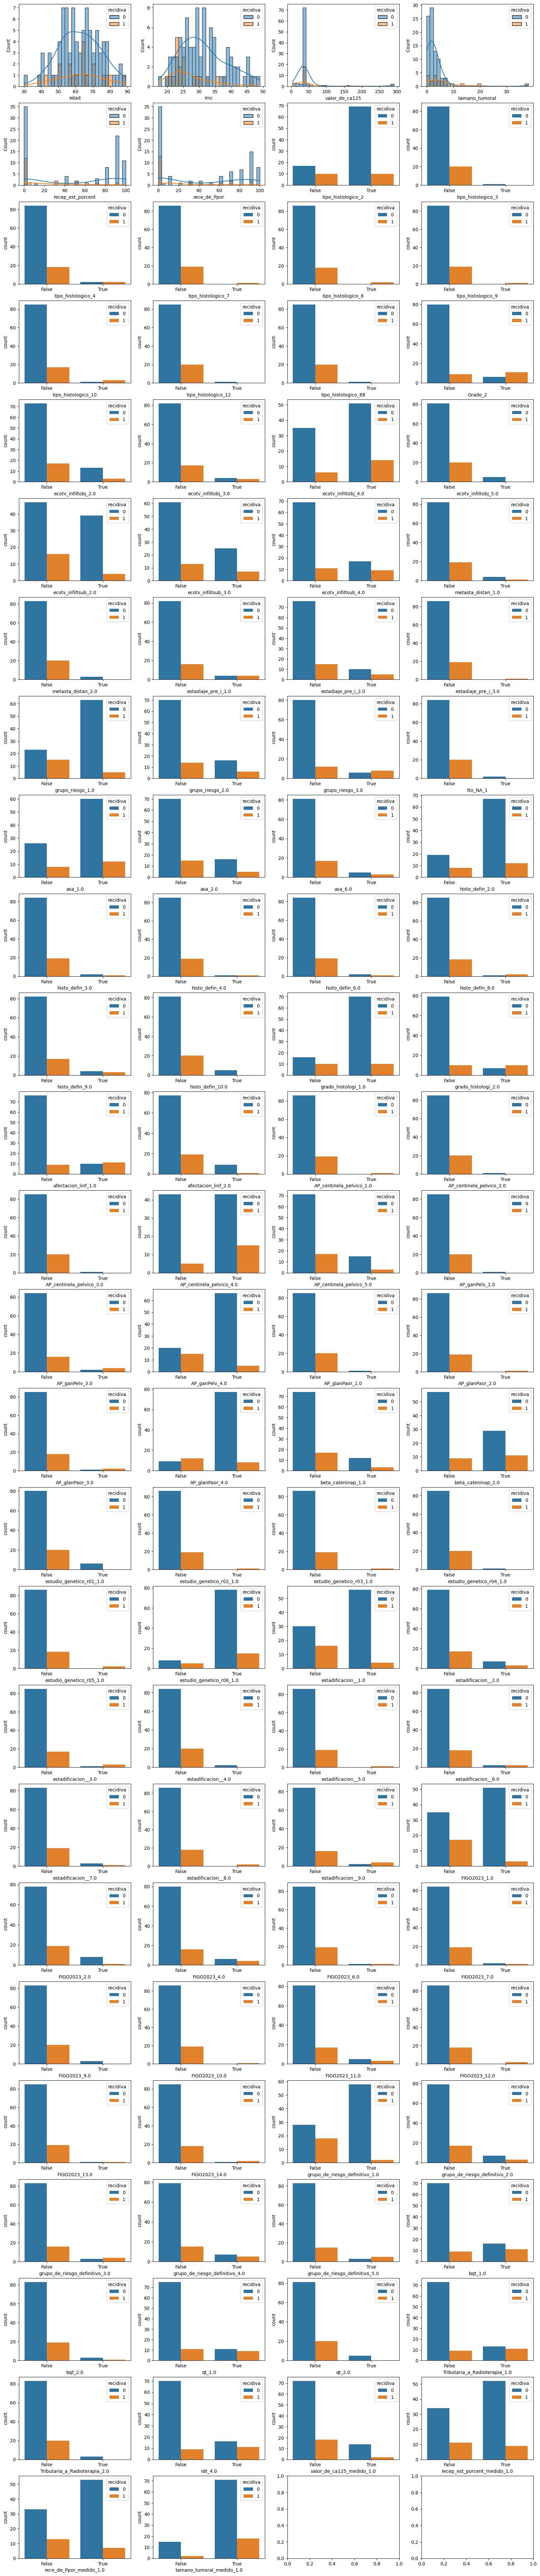

In [18]:
fig, axes = plt.subplots(26, 4, figsize=(20, 100))

cols = X_train_ohe.columns

for i, val in enumerate(cols):
    ax = axes.flatten()[i]

    if X_train_ohe[val].dtype == "category":
        sns.countplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            ax=ax
        )
    else:
        sns.histplot(
            data=X_train_ohe,
            x=val,
            hue=y_train,
            bins=30,
            kde=True,
            ax=ax
)
    

In [19]:
std = StandardScaler()

X_train_std = X_train_ohe.copy()
X_train_std[cols] = std.fit_transform(X_train_std[cols])

In [20]:
X_train_std.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,106.0,1.942890e-16,1.004751,-2.656174,-0.686688,0.051869,0.687849,2.185479
imc,106.0,-3.665831e-16,1.004751,-1.835747,-0.754211,-0.185711,0.545713,2.573594
valor_de_ca125,106.0,6.860340e-17,1.004751,-0.987470,-0.157120,-0.157120,-0.157120,6.642194
tamano_tumoral,106.0,8.379042e-18,1.004751,-0.704486,-0.529541,-0.196581,0.198455,7.873459
recep_est_porcent,106.0,5.970067e-17,1.004751,-1.020236,-1.020236,-0.076974,1.102104,1.337920
...,...,...,...,...,...,...,...,...
rdt_4.0,106.0,-9.845374e-17,1.004751,-0.584613,-0.584613,-0.584613,1.136747,1.710534
valor_de_ca125_medido_1.0,106.0,-1.047380e-18,1.004751,-0.421637,-0.421637,-0.421637,-0.421637,2.371708
recep_est_porcent_medido_1.0,106.0,1.675808e-17,1.004751,-1.164283,-1.164283,0.858898,0.858898,0.858898
rece_de_Ppor_medido_1.0,106.0,1.885284e-17,1.004751,-1.142080,-1.142080,0.875595,0.875595,0.875595


In [21]:
pca_recidiva = PCA().fit(X_train_std[cols]);

print(pca_recidiva.explained_variance_ratio_)
print(pca_recidiva.explained_variance_ratio_.cumsum())

[1.26682456e-01 7.17264339e-02 5.37643299e-02 4.58936116e-02
 4.14467522e-02 3.88947892e-02 3.63537547e-02 3.31706122e-02
 3.22728300e-02 2.88182816e-02 2.78447092e-02 2.61946149e-02
 2.51074179e-02 2.36800502e-02 2.27284282e-02 2.25160495e-02
 1.92890746e-02 1.89947128e-02 1.80752346e-02 1.71258077e-02
 1.58678336e-02 1.53279549e-02 1.48750545e-02 1.39206822e-02
 1.31816332e-02 1.27919160e-02 1.24983850e-02 1.14307151e-02
 1.09296285e-02 1.04734158e-02 9.80658649e-03 9.08284101e-03
 8.68909795e-03 8.34353837e-03 7.47563106e-03 7.25073619e-03
 7.06948861e-03 6.67513217e-03 6.27961467e-03 5.60984774e-03
 5.28836718e-03 4.83999247e-03 4.30780367e-03 4.05610405e-03
 3.85210592e-03 3.67698106e-03 3.59811439e-03 2.99794429e-03
 2.47797319e-03 2.39977530e-03 2.13229538e-03 2.01238255e-03
 1.97361684e-03 1.76712261e-03 1.70964145e-03 1.62330830e-03
 1.39563487e-03 1.31883002e-03 1.15408605e-03 1.01465944e-03
 9.43655728e-04 9.12400237e-04 8.03239627e-04 7.91340550e-04
 7.09417241e-04 6.132016

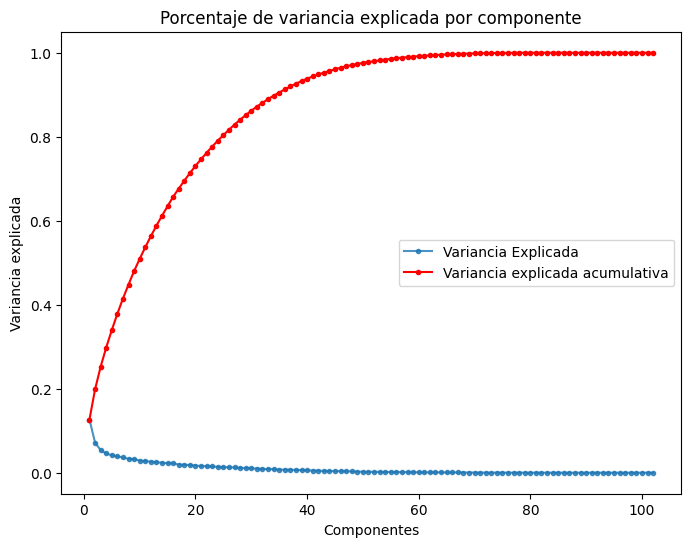

In [22]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),pca_recidiva.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca_recidiva.explained_variance_ratio_ )+1),
         np.cumsum(pca_recidiva.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

/tmp/ipykernel_11147/2305168464.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
/tmp/ipykernel_11147/2305168464.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
/tmp/ipykernel_11147/2305168464.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

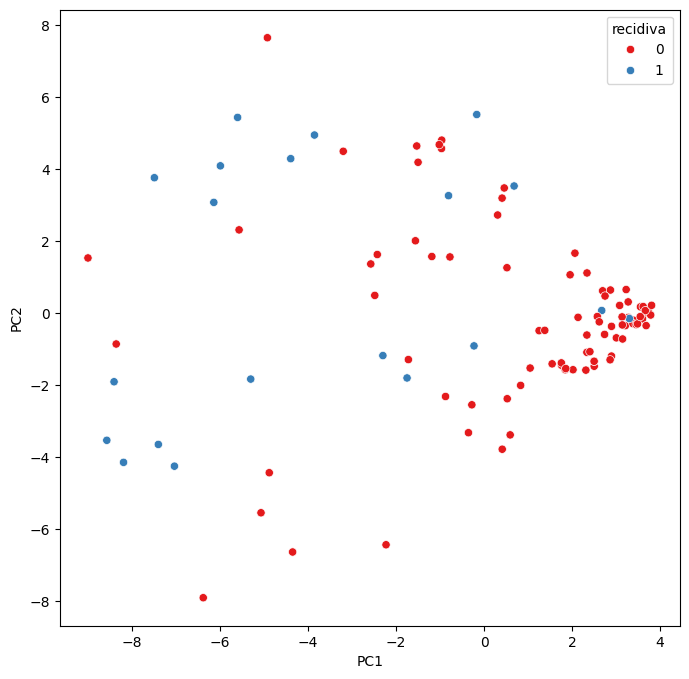

In [23]:
train_pca = pca_recidiva.transform(X_train_std[cols])
X_train_std[['PC1','PC2', 'PC3']] = train_pca[:,:3]
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_std, palette="Set1")

In [24]:
fig = px.scatter_3d(X_train_std, x='PC1', y='PC2', z='PC3',
              color=y_train)
fig.show()